In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data in pandas's dataframe
train_data = pd.read_csv('train_s3TEQDk.csv')
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# What we understand from the above data view and data dictionary is as follows:

# ID || Unique Identifier for a row

# Gender || Gender of the Customer

# Age || Age of the Customer (in Years)

# Region_Code || Code of the Region for the customers

# Occupation || Occupation Type for the customer

# Channel_Code || Acquisition Channel Code for the Customer (Encoded)

# Vintage || Vintage for the Customer (In Months)

# Credit_Product || If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

# Avg_Account_Balance || Average Account Balance for the Customer in last 12 Months

# Is_Active || If the Customer is Active in last 3 Months

# Is_Lead(Target) || If the Customer is interested for the Credit Card



# Some theries we can check from the above dataset is as follows:

# 1. Does the present of active credit product make him more likely to by the credit card
# 2. Is there a region based varing usage of the credit card buying habbits
# 3. How does the oocupation of the customer predict the user of credit card or not
# 4. Credit cards buying interest accros age and gender
# 5. Does the account balance determine the cutomer interest of credit card


# Finally we predict the if the customer is interested to by the credit card or not and should we target them as potiential cutomer or not

In [5]:
# count the number of entries in the dataset
train_data['ID'].count()

np.int64(245725)

In [6]:
# identify the number of null values in each of the fields
train_data.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [7]:
# we can check the % of null values
(train_data['Credit_Product'].isna().sum()/train_data['Credit_Product'].count())*100

np.float64(13.551293900184843)

In [8]:
# we can remove the ID column from dataframe 
# axis 0: corresponds to rows
# axis 1: corresponds to columns
train_data.drop('ID', axis = 1, inplace=True)

In [9]:
# now we check the information of the dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [11]:
# segrigating the columns into category and numerical type based on value
category_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
numerical_cols = [col for col in train_data.columns if train_data[col].dtype != 'object']

# remove the field we are doing predictive analysis
numerical_cols.remove('Is_Lead')

print(category_cols)
print(numerical_cols)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
['Age', 'Vintage', 'Avg_Account_Balance']


[]

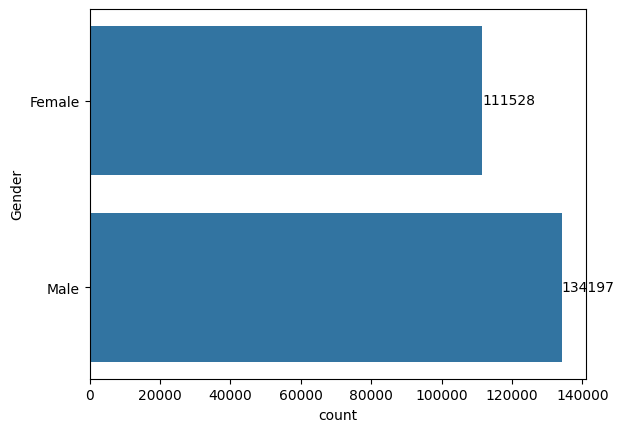

In [14]:
# Let us plot for all the category values

# Let us understand the distribution of gender in the dataset
ax = sns.countplot(train_data[category_cols[0]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

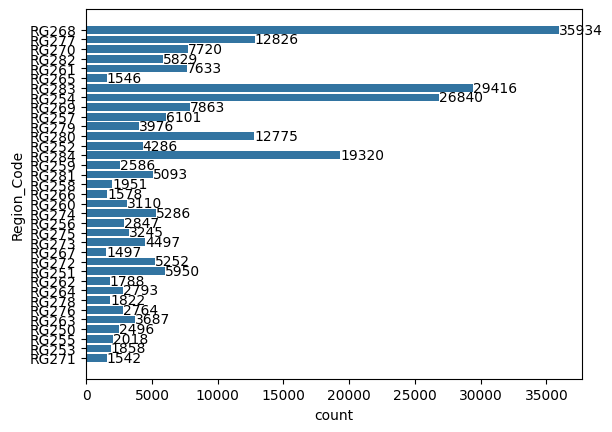

In [15]:
# Let us understand the distribution of Region Code in the dataset
ax = sns.countplot(train_data[category_cols[1]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

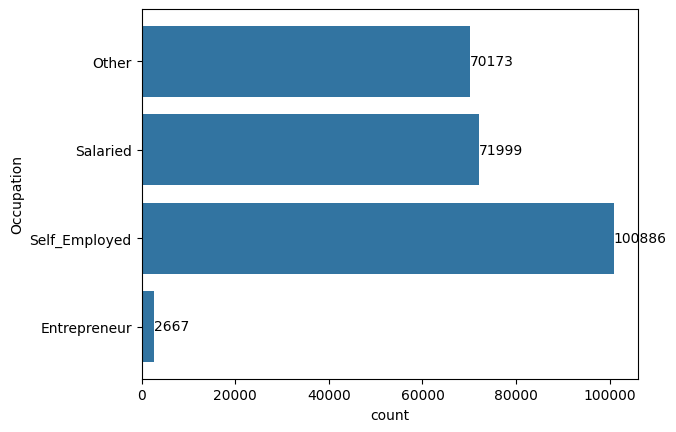

In [17]:
# Let us understand the distribution of Occupation in the dataset
ax = sns.countplot(train_data[category_cols[2]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

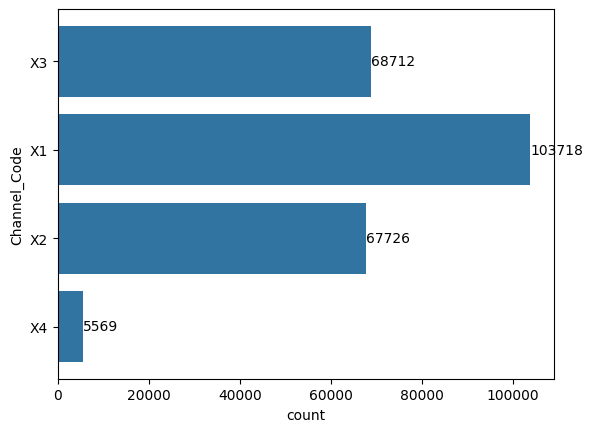

In [18]:
# Let us understand the distribution of Channel Code in the dataset
ax = sns.countplot(train_data[category_cols[3]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

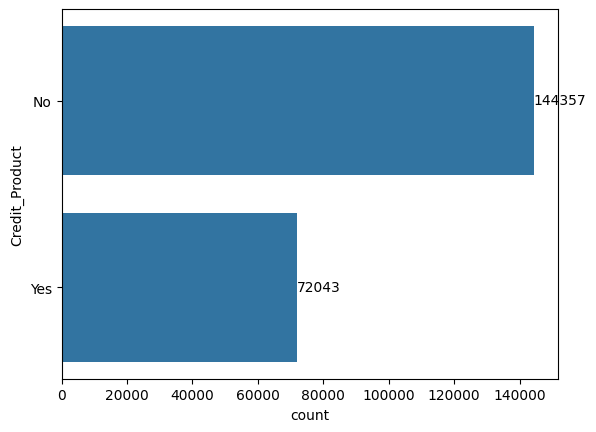

In [19]:
# Let us understand the distribution of Do they already have some Credit Product in the dataset
ax = sns.countplot(train_data[category_cols[4]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

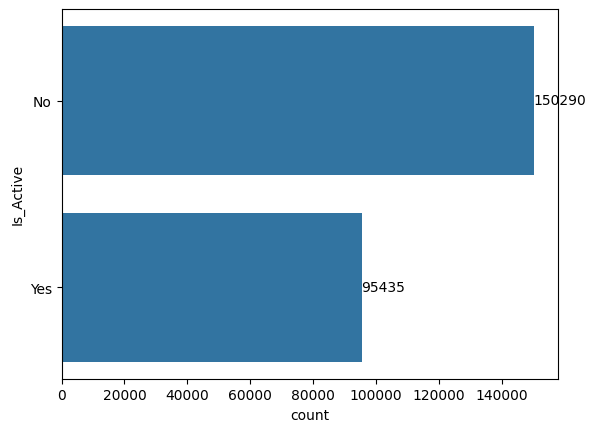

In [20]:
# Let us understand the distribution of Was the user active in last 3 months in the dataset
ax = sns.countplot(train_data[category_cols[5]])
ax.bar_label(ax.containers[0])
plt.plot()

[]

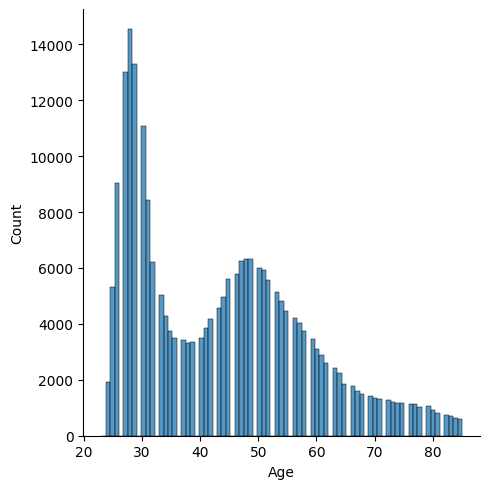

In [25]:
# Let us understand the distribution of Age in the dataset
ax = sns.displot(train_data[numerical_cols[0]])
plt.plot()

[]

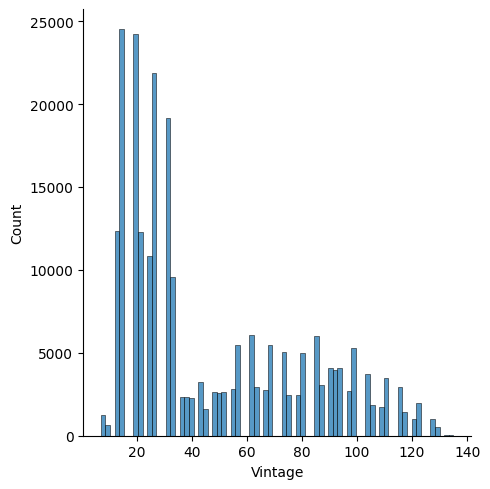

In [26]:
# Let us understand the distribution of vintage in the dataset
ax = sns.displot(train_data[numerical_cols[1]])
plt.plot()

[]

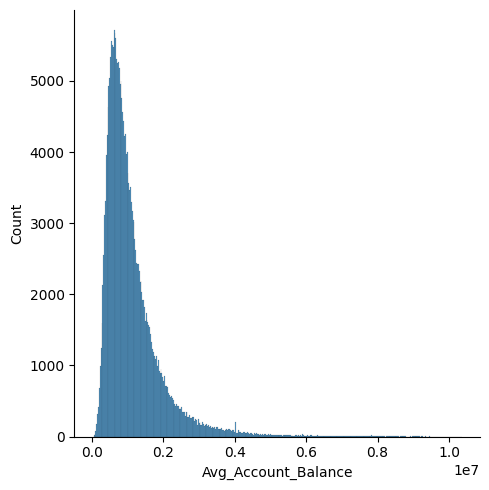

In [28]:
# Let us understand the distribution of average account balance in the dataset
ax = sns.displot(train_data[numerical_cols[2]])
plt.plot()

[]

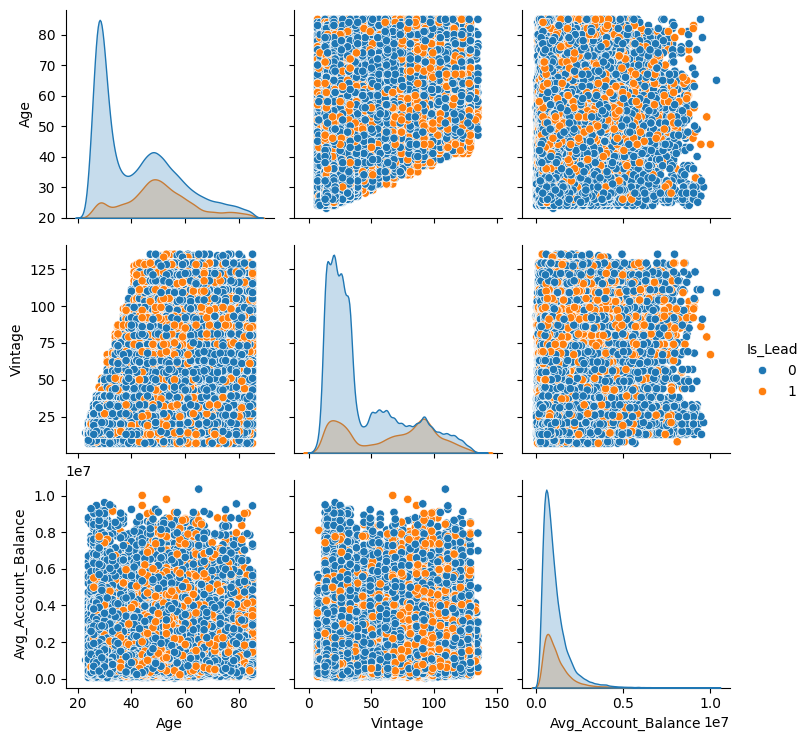

In [38]:
# Let us see a pair plot for numerical values
sns.pairplot(train_data[numerical_cols], hue = 'Is_Lead')
plt.plot()

[]

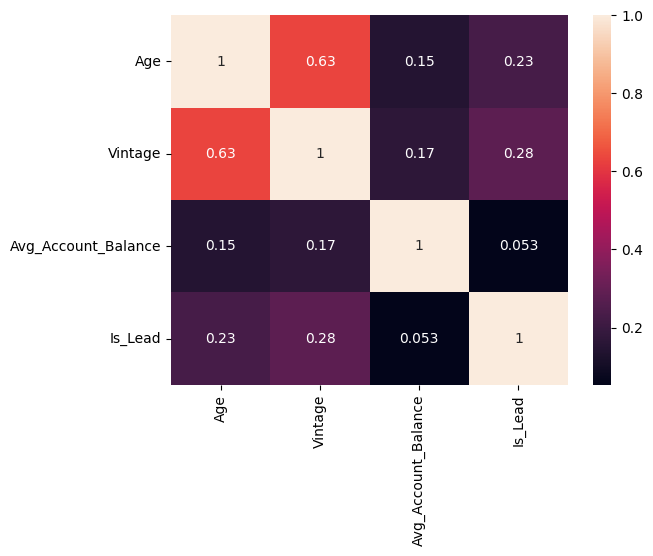

In [42]:
# we observe that the data is skewed

# let us observe a heat map 
sns.heatmap(train_data[numerical_cols+['Is_Lead']].corr(), annot=True)
plt.plot()

In [41]:
print(type(numerical_cols))

<class 'list'>
